<h1 style="text-align: center;">Travel Insurance Classifiation</h1>
<h3 style="text-align: center;">Muhammad Fa'iz Ismail</h3>

---

## **Section 1. Business Understanding**

**1.1 Context**

Travel insurance is essential for travelers to protect themselves during domestic and international trips. With increasing requirements for travel insurance in regions like Europe and America, insurance companies aim to provide reliable services and ensure proper risk management. To improve business outcomes, an insurance company needs to understand the behavior of policyholders, specifically those who file insurance claims. By analyzing historical policyholder data—including travel destinations, product purchases, and demographic attributes—the company can identify patterns and key indicators associated with insurance claims.

The company wants to predict which policyholders are likely to submit an insurance claim based on historical policyholder data. By understanding the characteristics and behaviors of these policyholders, the company can:

Improve risk assessment models.
Adjust pricing strategies for premiums.
Optimize marketing and operational strategies.
The main problem is identifying the critical features and behavioral patterns that indicate a policyholder will submit an insurance claim.

**1.2 Problem Statements**

**1.3 Goals**

1. Descriptive Analysis: Identify trends and insights within the policyholder data (e.g., common destinations, claim proportions, and agency performance).
2. Predictive Modeling: Develop a model to predict the likelihood of an insurance claim based on historical data.
3. Recommendations: Provide actionable insights to improve risk assessment, adjust premiums, and target policyholders more effectively.

**1.4 Analytical Approach**

1. Cleaning Data:
   - Check for missing values, duplicates, and outliers.
   - Understand the distribution of key features (e.g., destination, duration, net sales, and age).

2. Exploration Data Analysis:
   - Use summary statistics to understand general patterns.
   - Visualize trends in claims submission by analyzing:
     - Destination vs. Claim rate.
     - Age and Duration distribution among claimants.
     - Agency performance and commission insights.


3. Feature Engineering:
   - Encode categorical variables such as Agency Type, Product Name, and Destination.

4. Predictive Modeling:
   - Build classification models to predict claim submission (Claim as the **target** variable).
   - Possible models:
     1. Logistic Regression.
     2. Decision Tree/Random Forest.
     3. XGBoost/LightGBM.

5. Summarize key findings from the analysis.
   - Provide actionable recommendations for risk management, pricing strategies, and customer targeting.

**1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

- **Business Metric**
In the travel insurance industry, several important business metrics are used to measure business performance and ensure operational efficiency. Here are some of the metrics that this project will focus on :
  1. Premium Metrics
     - **Gross Written Premium (GWP)**: Total nilai premi yang ditulis oleh perusahaan selama periode tertentu, termasuk premi yang belum diterima
     - **Net Earned Premium (NEP)**: Premi yang benar-benar diakui sebagai pendapatan setelah memperhitungkan risiko yang diasuransikan selama periode tertentu.
  2. Loss Metrics
     - **Loss Ratio**: Rasio klaim yang dibayarkan terhadap premi yang diperoleh 
     - **Severity of Claims**: Rata-rata biaya per klaim

- **Machine Learning Evaluation Metric**
In the travel insurance domain, precision emerges as a critical business metric for evaluating machine learning model performance. The following detailed breakdown highlights its strategic importance::
  1. Precision-Focused Performance Metrics
     - **Precision Rate**: A key indicator measuring the model's ability to accurately predict valid claims, directly correlating with financial risk management
     - **False Positive Impact**: In travel insurance, false positives are the most expensive risk. Every false claim paid out results in immediate financial loss.
  2. Complementary Claim Classification Metrics
     - **Recall Performance**: Ensures legitimate claims are not overlooked while maintaining strict fraud prevention
     - **F0.5 Score**: Provides a balanced evaluation between precision and recall, but still prioritize precision rate

**1.6 Success Criteria**

A machine learning classification in travel insurance can be considered successful if it meets the following criteria, which depend on the specific purpose of the model. Here are the points of success:

1. Model Accuracy Above 85%
   - Accuracy indicates the proportion of correct predictions, but in the insurance industry, data is often imbalance
   - Therefore, an accuracy above 85% is considered sufficiently reliable

2. Precision Above 85%
   - High precision indicates the model's ability to identify valid claims with a low error rate
   - Prevents financial leakage. Each fraudulent claim has a direct impact on profitability

3. Recall Above 70%
   - For risk detection models, to ensure that high-risk or fraudulent claims are not missed
   - A KPMG (2023) study indicates that overly strict insurance approaches can reduce customer retention by up to 15%

## **Section 2. Data Understanding**

In [1]:
# Library

import pandas as pd
import numpy as np
import missingno

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OneHotEncoder, TargetEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
from scipy.stats import chi2_contingency

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from category_encoders import BinaryEncoder
from collections import Counter


# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

**2.1 General Information**

| Attribute                | Data Type       | Description                                                           |
|--------------------------|-----------------|-----------------------------------------------------------------------|
| Agency                   | Object            | Name of the insurance agency issuing the policy                                   |
| Agency Type              | Object            | Category or type of travel insurance agency       |
| Distribution Channel     | Object            | Method of selling insurance products |
| Product Name             | Object            |  Official name of a specific travel insurance product                       |
| Gender                   | Object            | Gender of the insured person (M, F)                                   |
| Duration                 | Integer         | Duration of travel in days                                            |
| Destination              | Object            | Travel destination of the insured person                              |
| Net Sales                | Float           | Amount of sales generated by the travel insurance policy              |
| Commision (in value)     | Float           | Commission earned by the agency for the insurance policy              |
| Age                      | Integer         | Age of the insured person                                             |
| Claim                    | Object            | Claim status (Yes, No) indicating whether a claim was made against the policy |

**2.2 Feature Information**

| Feature | Impact to Business |
|---------| ------------------ |
|Agency | Helps understand sales patterns and contributions from each agency |
| Agency Type  | Determines which agency type is more effective in selling insurance products |
| Distribution Channel | Measures the effectiveness of each distribution channel in attracting customers |
| Product Name | Evaluates underperforming products for innovation or feature improvements | 
| Gender | Analyzes differences in behavior based on gender |
| Duration | Helps set accurate pricing for premiums based on duration risk |
| Destination | Helps segment the market based on popular destinations and Determines premium pricing strategies based on destination risks |
| Net Sales | Forms the basis for strategies to boost sales and increase company revenue | 
| Commission (in value) | Forms a basis for designing balanced incentive schemes for agencies |
| Age | Helps segment the market to design products and premium pricing tailored to age demographics.Helps segment the market to design products and premium pricing tailored to age demographics | 


**2.3 Statistics Summary**

In [2]:
df = pd.read_csv(r'D:\Purwadhika\Module 3. Machine Learning\Capstone\travel_insurance\data\raw\data_travel_insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [4]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [5]:
df.describe(include='object')

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


## **Section 3. Data Cleaning**

**3.1 Missing Values**

In [6]:
# Check missing values
print("Total rows that have missing values: ", df.isnull().sum().sum())

Total rows that have missing values:  31647


In [7]:
df.isna().sum()/len(df.index)*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Gender                  71.392799
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Age                      0.000000
Claim                    0.000000
dtype: float64

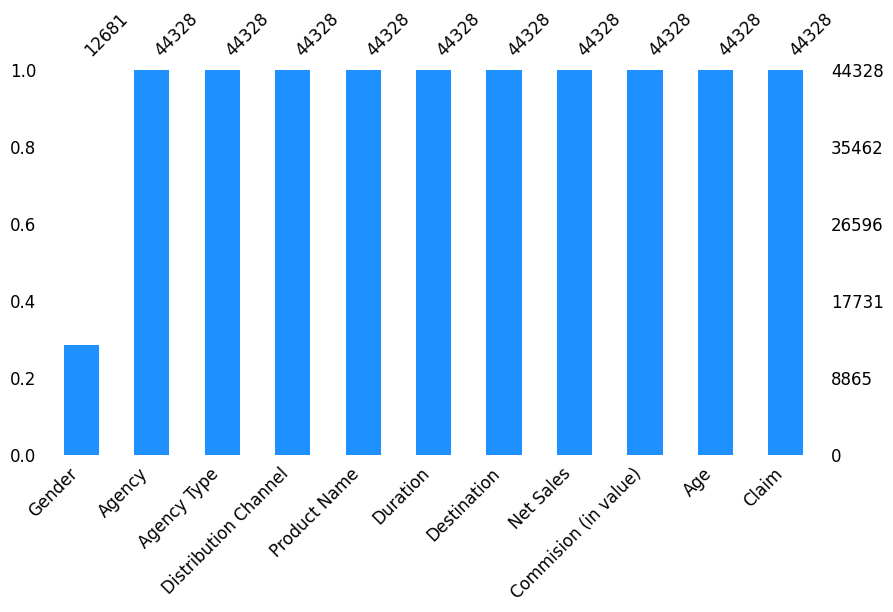

In [8]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

<Axes: >

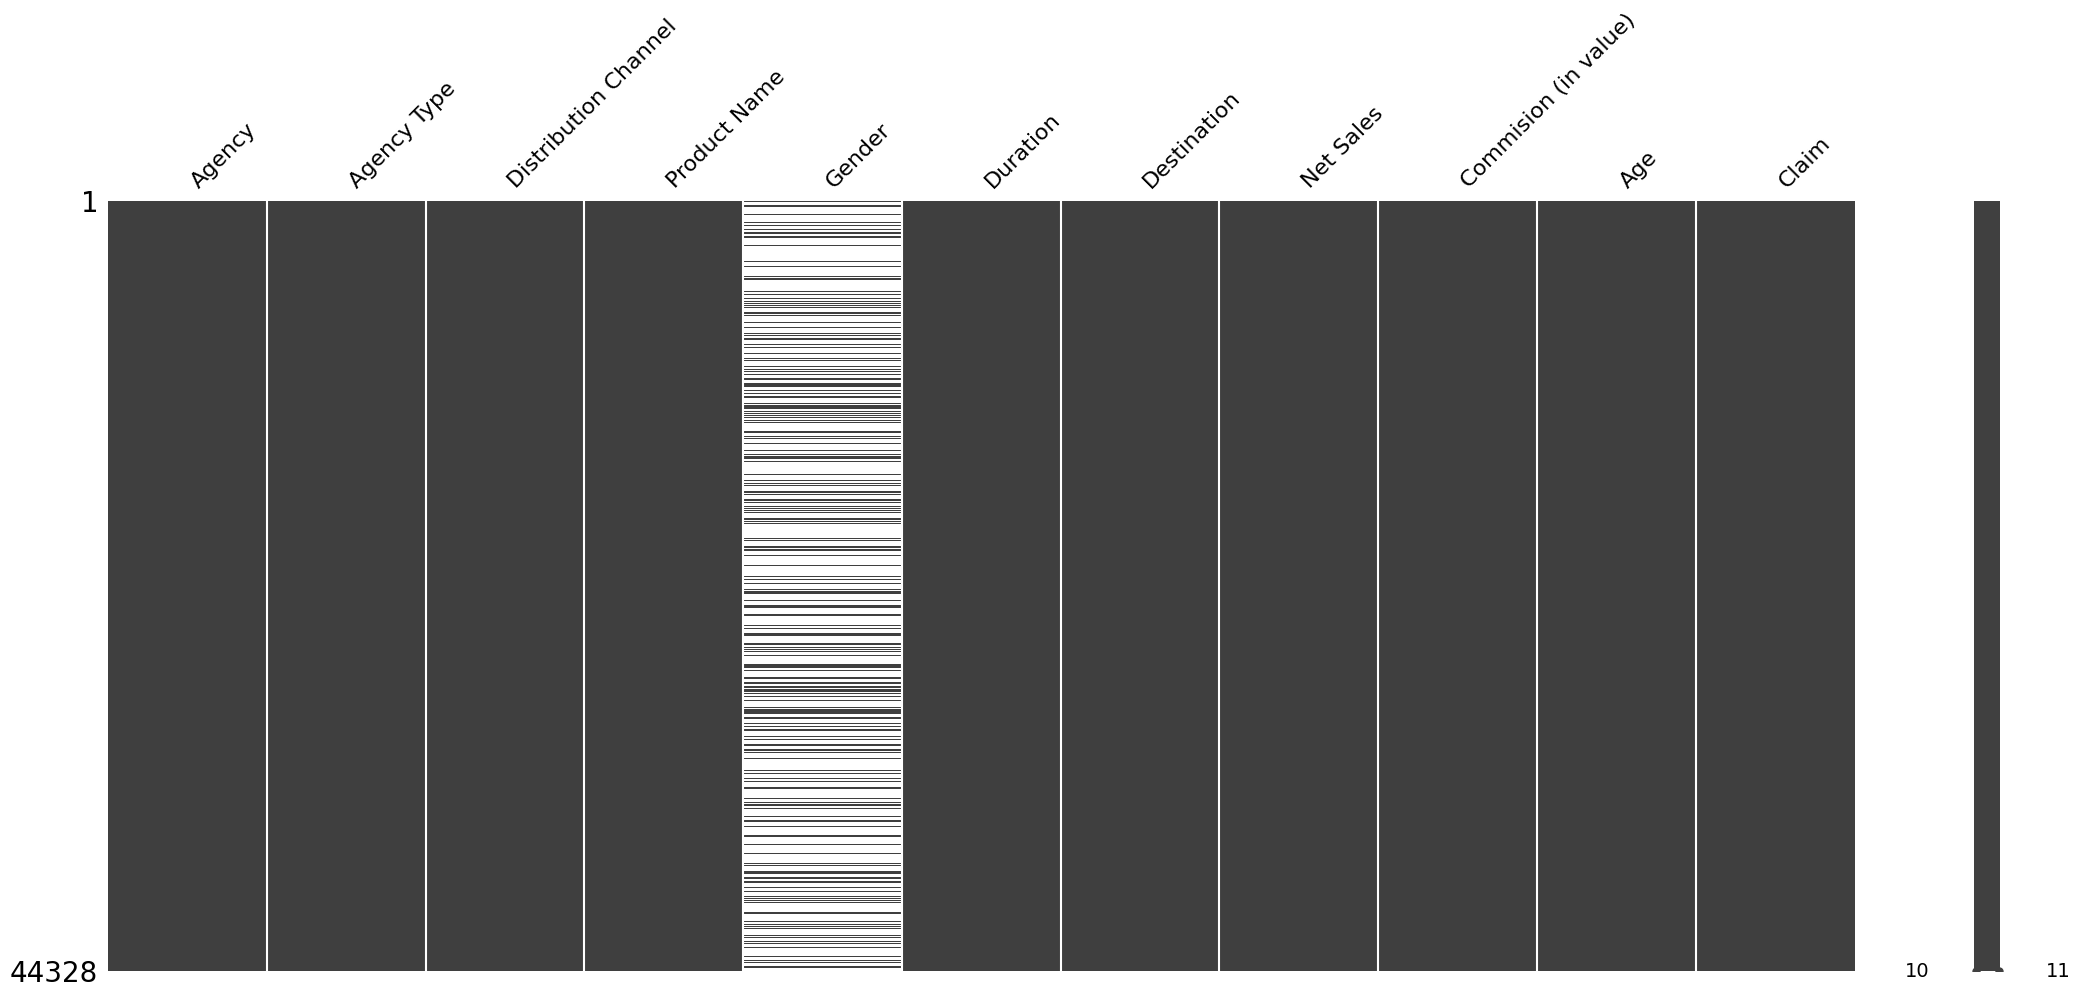

In [9]:
missingno.matrix(df)

In [10]:
clean_df = df.drop(['Gender'], axis=1)
clean_df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


**3.2 Duplicated Values**

In [11]:
# Duplicated rows
print("Total duplicated rows: ", clean_df.duplicated().sum())

Total duplicated rows:  5004


In [12]:
cleaned_df = clean_df.drop_duplicates(keep='first').reset_index(drop=True)
cleaned_df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
39319,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
39320,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
39321,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
39322,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


**3.3 Identify Spelling Errors**

In [13]:
# Data Cleaning - Categoric Variable

categoric_features = cleaned_df.select_dtypes('object')

for col in categoric_features.columns:
    print(f"Total category on '{col}': {cleaned_df[col].nunique()}")

Total category on 'Agency': 16
Total category on 'Agency Type': 2
Total category on 'Distribution Channel': 2
Total category on 'Product Name': 26
Total category on 'Destination': 138
Total category on 'Claim': 2


In [14]:
for col in categoric_features.columns:
    print(f"Column: {col}")
    print(cleaned_df[col].value_counts())
    print()

Column: Agency
Agency
EPX    20990
CWT     5726
C2B     5334
JZI     4233
SSI      711
LWC      452
RAB      440
TST      329
JWT      284
KML      229
ART      226
CCR      114
CSR       68
CBH       67
TTW       66
ADM       55
Name: count, dtype: int64

Column: Agency Type
Agency Type
Travel Agency    28096
Airlines         11228
Name: count, dtype: int64

Column: Distribution Channel
Distribution Channel
Online     38613
Offline      711
Name: count, dtype: int64

Column: Product Name
Product Name
Cancellation Plan                       11009
2 way Comprehensive Plan                 8133
Rental Vehicle Excess Insurance          5726
Basic Plan                               3638
Bronze Plan                              2634
1 way Comprehensive Plan                 1848
Value Plan                               1549
Silver Plan                              1480
Annual Silver Plan                        849
Ticket Protector                          711
Travel Cruise Protect            

**3.4 Identify Anomaly Values**
- Check Distribution (Numerical Variable)


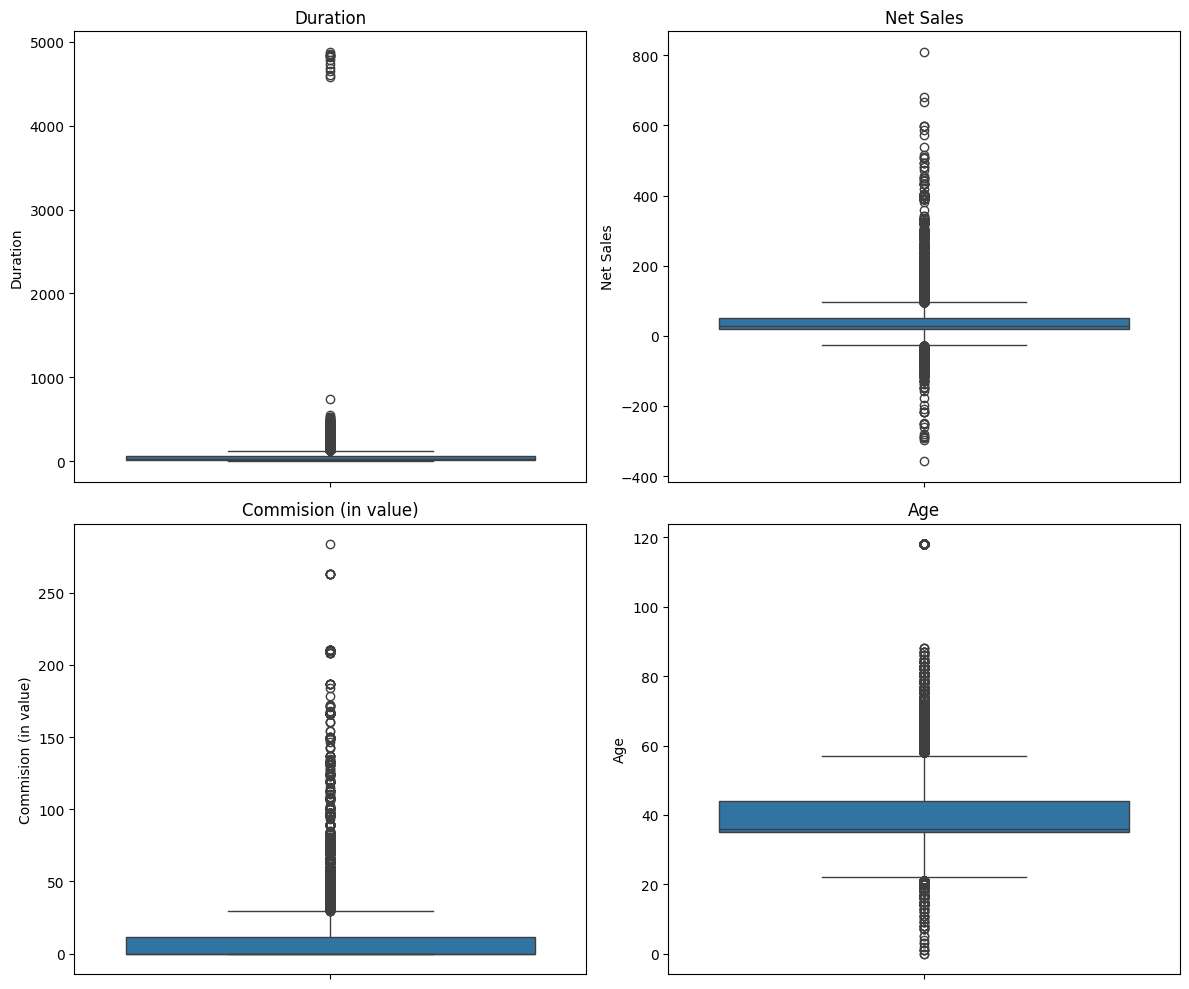

In [15]:
# Identify numeric features
numeric_features = cleaned_df.drop('Claim', axis=1).select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 10))
for idx, feature in enumerate(numeric_features, start=1):
    sns.boxplot(cleaned_df[feature], ax=plt.subplot(2, 2, idx))
    plt.subplot(2, 2, idx).set_title(feature)
plt.tight_layout()
plt.show()

In [16]:
filtered_df = cleaned_df[(cleaned_df['Duration'] <= 4000) & (cleaned_df['Age'] <= 100)]

In [17]:
print(f"Jumlah data sebelum filter: {len(cleaned_df)}")
print(f"Jumlah data setelah filter: {len(filtered_df)}")

Jumlah data sebelum filter: 39324
Jumlah data setelah filter: 38888


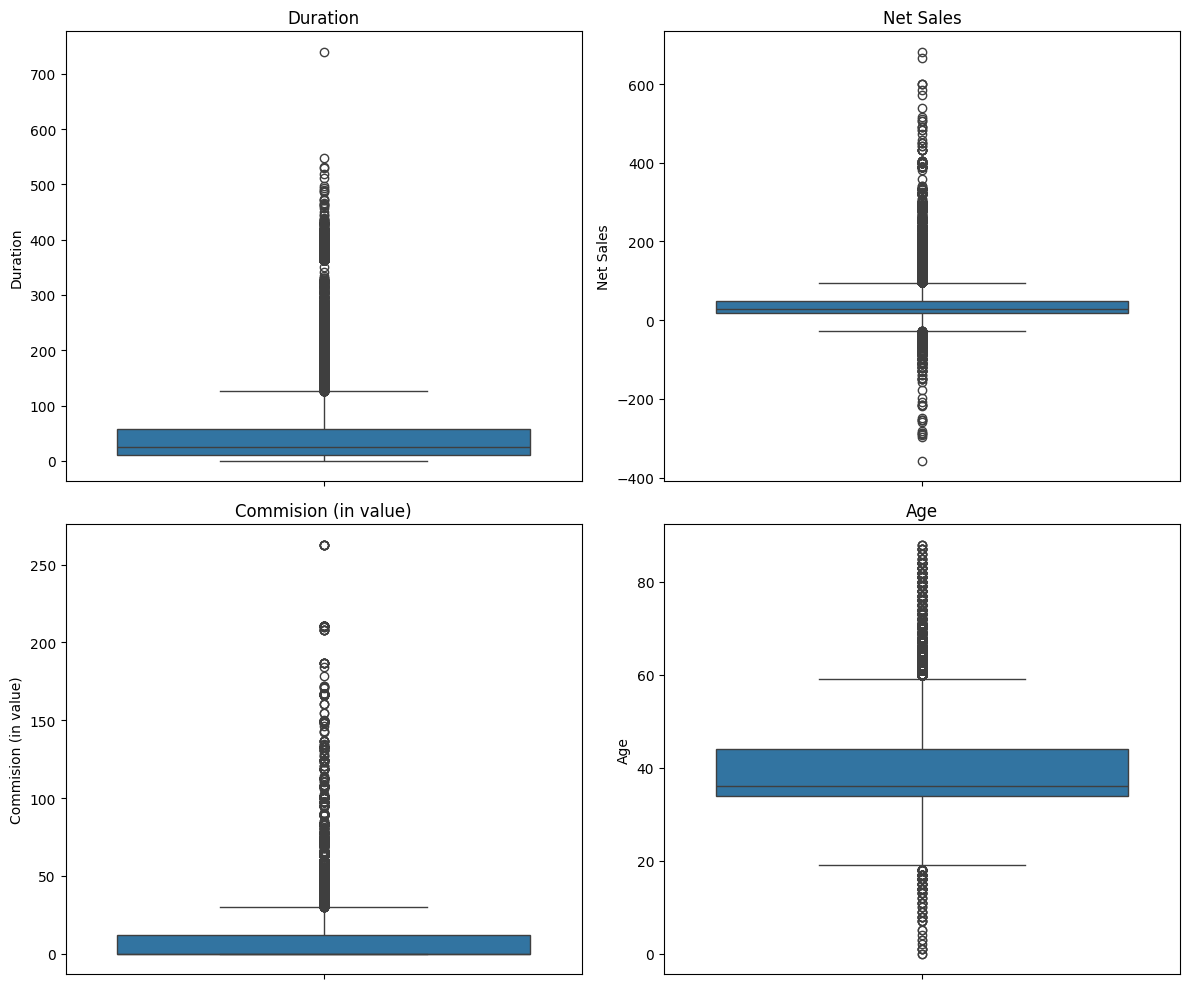

In [18]:
# Identify numeric features
numeric_features = filtered_df.drop('Claim', axis=1).select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 10))
for idx, feature in enumerate(numeric_features, start=1):
    sns.boxplot(filtered_df[feature], ax=plt.subplot(2, 2, idx))
    plt.subplot(2, 2, idx).set_title(feature)
plt.tight_layout()
plt.show()

- Check Cardinality (Categorical Variable)

In [19]:
categorical_features = filtered_df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    print(f"Total unique values on `{feature}`: {filtered_df[feature].nunique()}")
    print(filtered_df[feature].value_counts(normalize=True))
    print()

Total unique values on `Agency`: 15
Agency
EPX    0.539009
CWT    0.147218
C2B    0.137163
JZI    0.107617
SSI    0.017769
LWC    0.011623
RAB    0.011315
TST    0.008460
KML    0.005889
ART    0.004937
CCR    0.002443
CSR    0.001749
CBH    0.001723
TTW    0.001697
ADM    0.001389
Name: proportion, dtype: float64

Total unique values on `Agency Type`: 2
Agency Type
Travel Agency    0.721199
Airlines         0.278801
Name: proportion, dtype: float64

Total unique values on `Distribution Channel`: 2
Distribution Channel
Online     0.983157
Offline    0.016843
Name: proportion, dtype: float64

Total unique values on `Product Name`: 26
Product Name
Cancellation Plan                       0.283044
2 way Comprehensive Plan                0.208522
Rental Vehicle Excess Insurance         0.147218
Basic Plan                              0.092548
Bronze Plan                             0.067733
1 way Comprehensive Plan                0.047444
Silver Plan                             0.038058
Val

In [20]:
filtered_df.to_csv('clean_dataset.csv')

## **Section 4. Data Generation**

**4.1 Constructing `Seen` and `Unseen` Data**

In [21]:
# Define feature and target
feature = filtered_df.drop('Claim', axis=1)
target = filtered_df['Claim']

In [22]:
# Split data into Seen (80%) and Unseen (20%)
seen_data, unseen_data = train_test_split(filtered_df, test_size=0.2, random_state=42, stratify= target)

In [23]:
# Check the shape of each dataset
seen_shape = seen_data.shape
unseen_shape = unseen_data.shape

In [24]:
seen_shape, unseen_shape

((31110, 10), (7778, 10))

## **Section 5. Exploratory Data Analysis (EDA)**

**5.1 Analysis 1**

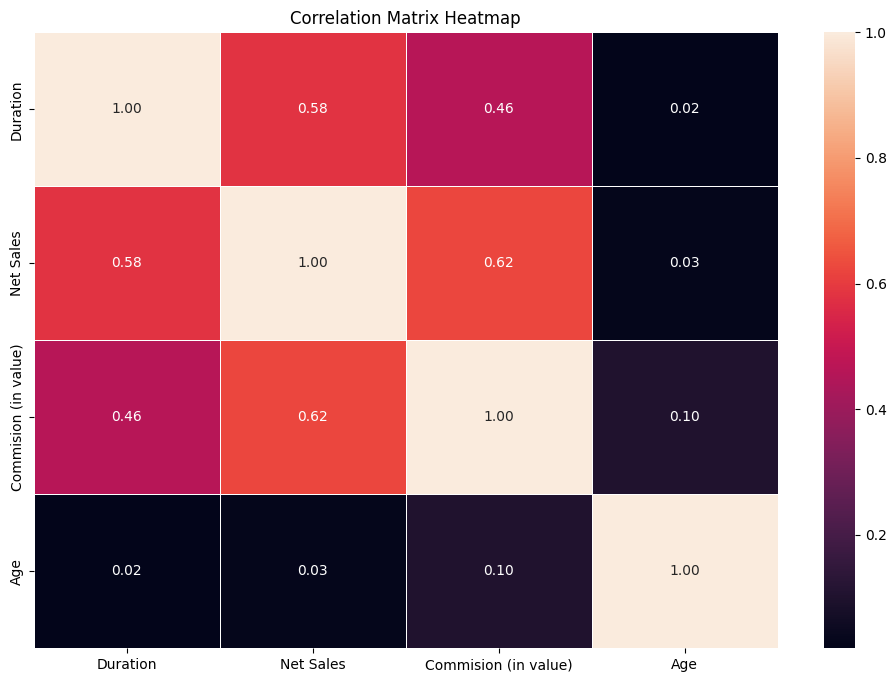

In [25]:
# Select only numeric columns from the data
numeric_data = seen_data.select_dtypes(include=['number'])

# Calculate the correlation matrix on numeric data only
correlation_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


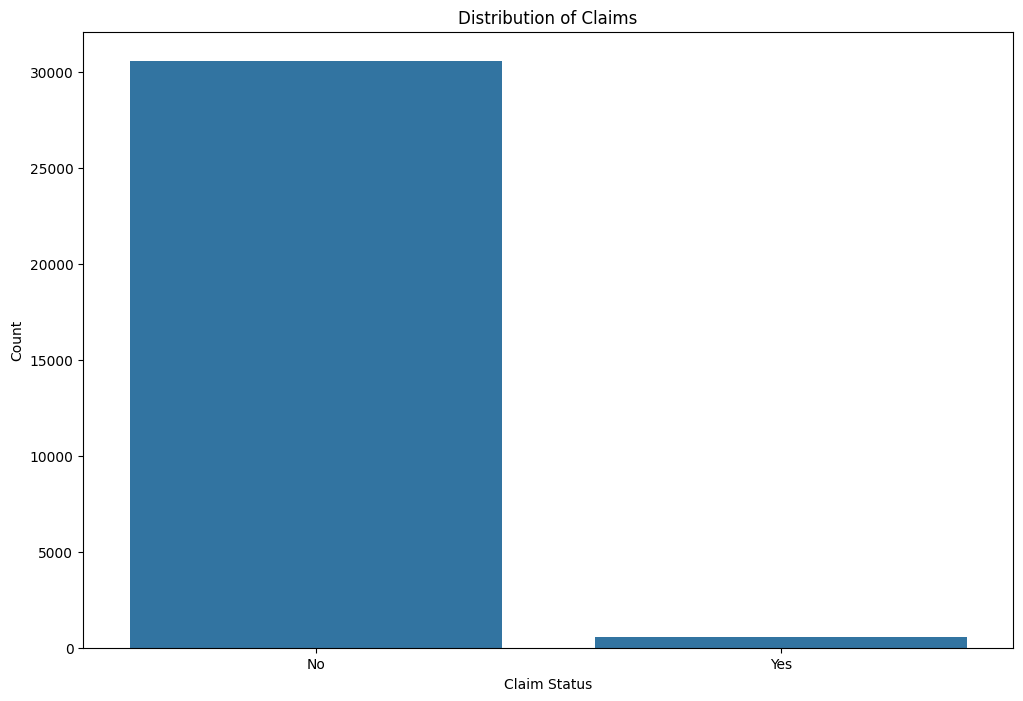

Claim
No     30577
Yes      533
Name: count, dtype: int64

In [26]:
claim_distribution = seen_data['Claim'].value_counts()
plt.figure(figsize=(12, 8))
sns.countplot(x='Claim', data=seen_data)
plt.title('Distribution of Claims')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

claim_distribution

**5.2 Analysis 2**

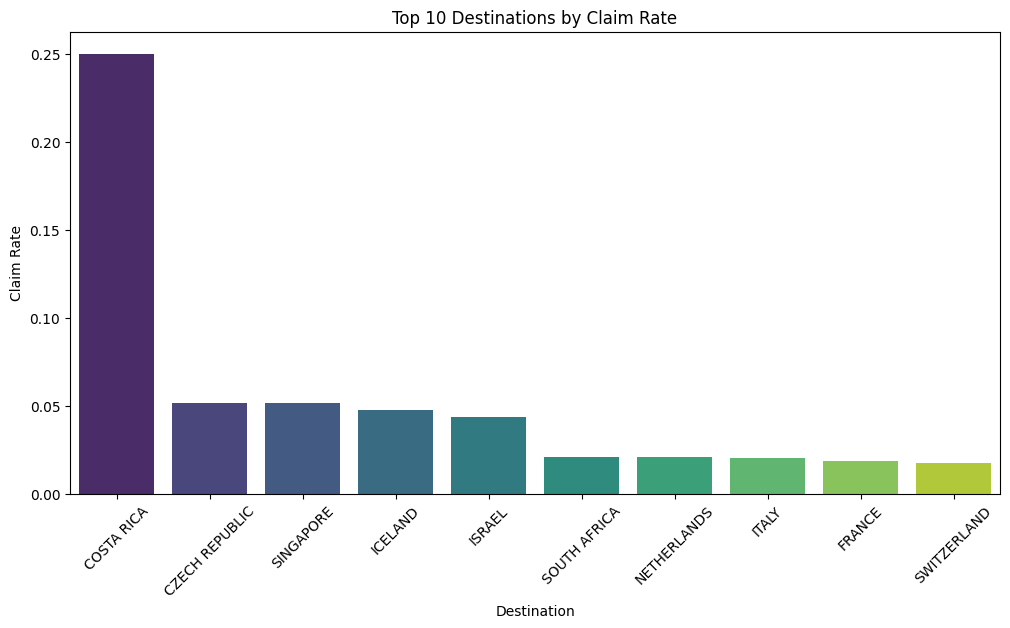

In [27]:
# Convert 'Claim' to a binary column for easier analysis
seen_data['Claim_Binary'] = seen_data['Claim'].apply(lambda x: 1 if x == 'Yes' else 0)

# Destination vs. Claim Rate
claim_rate_by_destination = seen_data.groupby('Destination')['Claim_Binary'].mean().sort_values(ascending=False).head(10)

# Plot Claim Rate by Destination
plt.figure(figsize=(12, 6))
sns.barplot(x=claim_rate_by_destination.index, y=claim_rate_by_destination.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Destinations by Claim Rate")
plt.ylabel("Claim Rate")
plt.xlabel("Destination")
plt.show()

**5.3 Analysis 3**

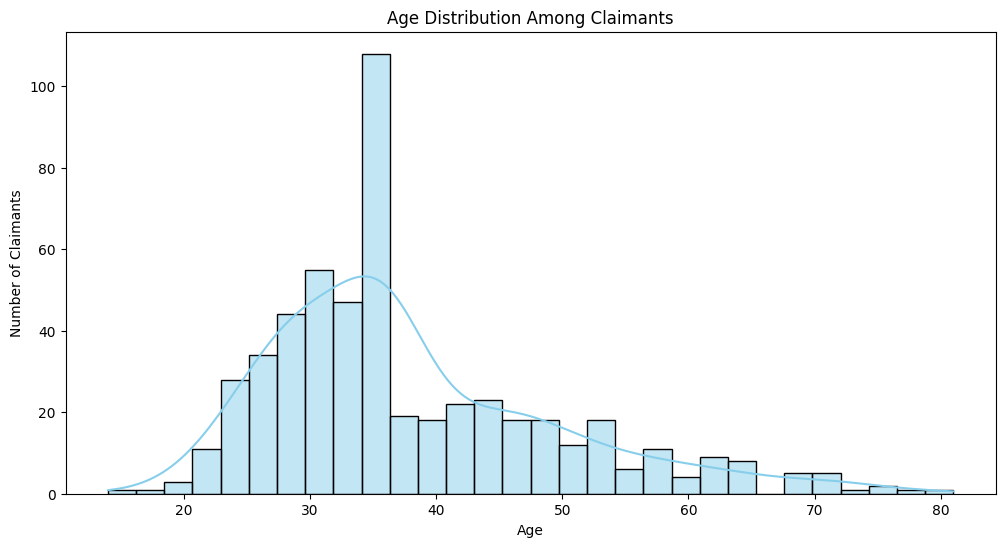

In [28]:
# Age Distribution Among Claimants
claimants_age = seen_data[seen_data['Claim'] == 'Yes']['Age']

# Plot Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(claimants_age, bins=30, kde=True, color='skyblue')
plt.title("Age Distribution Among Claimants")
plt.xlabel("Age")
plt.ylabel("Number of Claimants")
plt.show()

In [29]:
def cat_age(age):
    if age <= 17:
        return "Kid"
    elif 18 <= age <= 30:
        return "Young"
    elif 31 <= age <= 50:
        return "Mature"
    elif 51 <= age <= 65:
        return "Senior"
    elif age > 65:
        return "Old"
    else:
        return None
seen_data['category_age'] = seen_data['Age'].apply(cat_age)

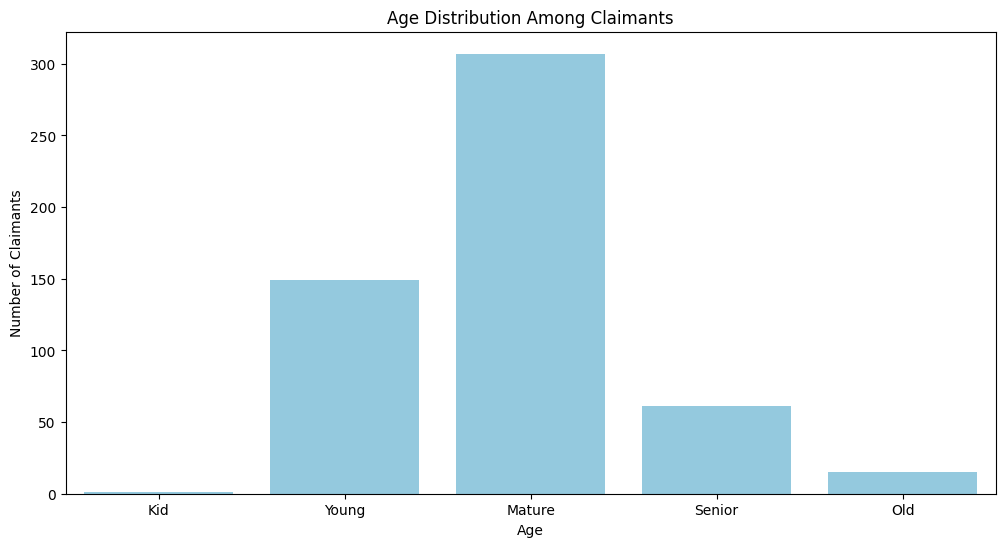

In [30]:
# Age Distribution Among Claimants
claimants_age = seen_data[seen_data['Claim'] == 'Yes']['category_age']
age_order = ["Kid", "Young","Mature", "Senior", "Old"]

# Plot Age Distribution as Bar Chart
plt.figure(figsize=(12, 6))
sns.countplot(data=seen_data[seen_data['Claim'] == 'Yes'], x='category_age', color='skyblue', order = age_order )
plt.title("Age Distribution Among Claimants")
plt.xlabel("Age")
plt.ylabel("Number of Claimants")
plt.show()

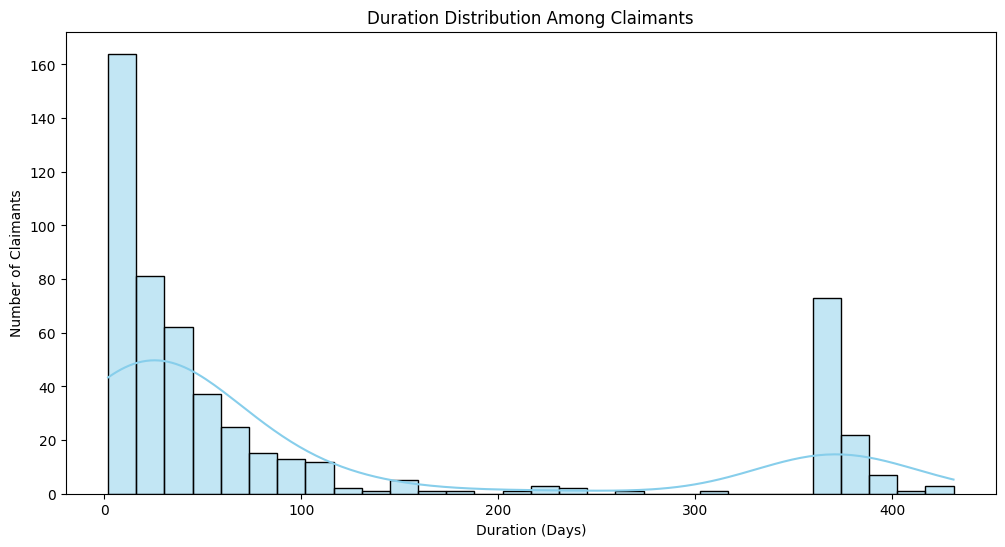

In [31]:
# Age Distribution Among Claimants
claimants_duration = seen_data[seen_data['Claim'] == 'Yes']['Duration']

# Plot Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(claimants_duration, bins=30, kde=True, color='skyblue')
plt.title("Duration Distribution Among Claimants")
plt.xlabel("Duration (Days)")
plt.ylabel("Number of Claimants")
plt.show()

In [32]:
def cat_duration(dur):
    if dur < 7:
        return "< 1 week"
    elif 7 <= dur <= 14:
        return "1-2 weeks"
    elif 15 <= dur <= 21:
        return "2-3 weeks"
    elif 22 <= dur <= 28:
        return "3-4 weeks"
    elif 29 <= dur <= 60:
        return "1-2 months"
    elif 61 <= dur <= 90:
        return "2-3 months"
    elif  dur > 90:
        return ">3 months"
    else:
        return None
seen_data['category_duration'] = seen_data['Duration'].apply(cat_duration)

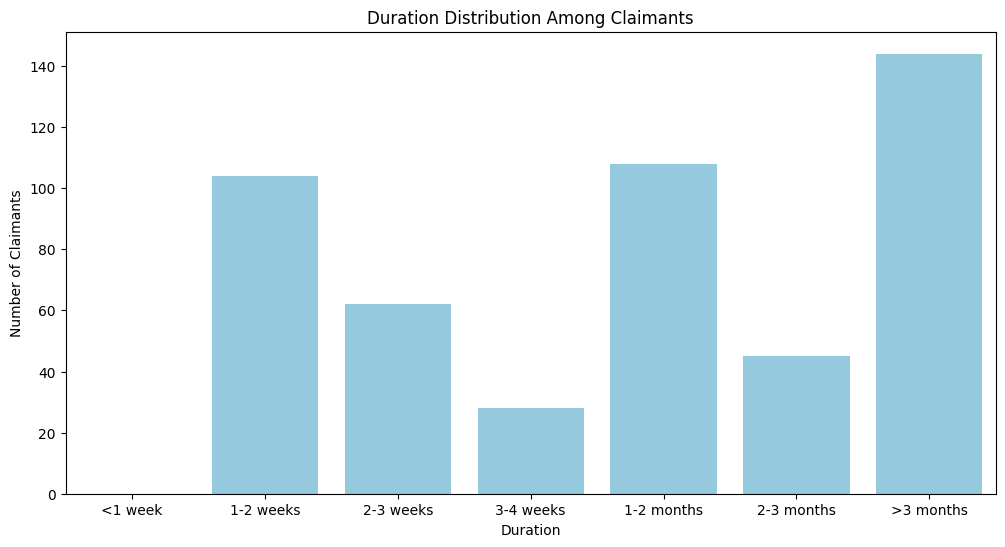

In [33]:
# Age Distribution Among Claimants
claimants_dur = seen_data[seen_data['Claim'] == 'Yes']['category_duration']
dur_order = ['<1 week', '1-2 weeks', '2-3 weeks', '3-4 weeks', '1-2 months', '2-3 months', '>3 months']

# Plot Age Distribution as Bar Chart
plt.figure(figsize=(12, 6))
sns.countplot(data=seen_data[seen_data['Claim'] == 'Yes'], x='category_duration', color='skyblue', order = dur_order )
plt.title("Duration Distribution Among Claimants")
plt.xlabel("Duration")
plt.ylabel("Number of Claimants")
plt.show()

**5.4 Analysis 4**

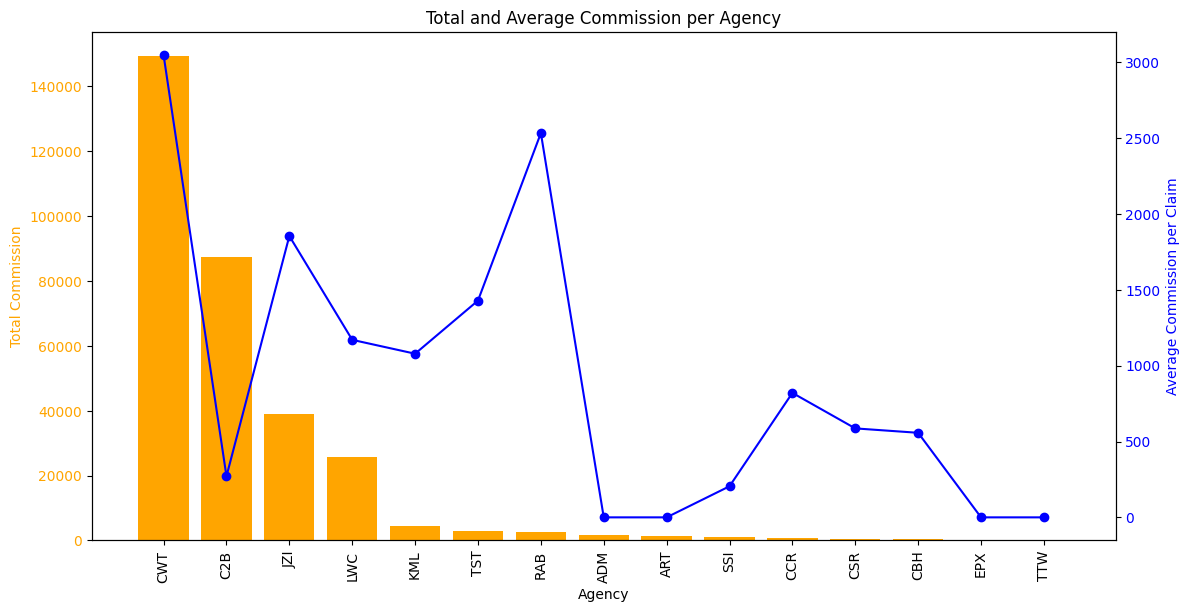

,Agency,Total Sales,Total Claims,Total Commission,Average Commission
6,CWT,196673.40,49,149295.96,3046.856327
2,C2B,333163.13,323,87486.85,270.857121
8,JZI,107414.00,21,38939.95,1854.283333
10,LWC,38901.90,22,25742.80,1170.127273
9,KML,11094.00,4,4314.52,1078.630000


In [34]:
# Group by Agency and summarize key metrics
agency_performance = seen_data.groupby('Agency').agg({
    'Net Sales': 'sum',
    'Claim': lambda x: (x == 'Yes').sum(),
    'Commision (in value)': 'sum'
}).reset_index()

# Rename columns for clarity
agency_performance.rename(columns={'Claim': 'Total Claims', 
                                   'Net Sales': 'Total Sales', 
                                   'Commision (in value)': 'Total Commission'}, inplace=True)

# Sort by Total Claims for better visualization
agency_performance = agency_performance.sort_values(by='Total Claims', ascending=False)

# Calculate average commission per agency
agency_performance['Average Commission'] = agency_performance['Total Commission'] / agency_performance['Total Claims']
agency_performance.replace([float('inf'), float('-inf')], 0, inplace=True)  # Replace division errors with 0

# Sort by Total Commission for visualization
agency_commission = agency_performance.sort_values(by='Total Commission', ascending=False)

# Plot Total Commission and Average Commission per Agency
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Commission
ax1.bar(agency_commission['Agency'], agency_commission['Total Commission'], color='orange', label='Total Commission')
ax1.set_xlabel('Agency')
ax1.set_ylabel('Total Commission', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
plt.xticks(rotation=90)

# Overlay Average Commission on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(agency_commission['Agency'], agency_commission['Average Commission'], color='blue', marker='o', label='Average Commission')
ax2.set_ylabel('Average Commission per Claim', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
plt.title('Total and Average Commission per Agency')
plt.show()

# Display the agencies with the highest total commission
agency_commission.head(5)


## **Section 6. Data Preparation**

**6.1 Initialization**
- Initialization function


In [35]:
# Load the dataset
df_ml = seen_data

# Display initial rows
df_ml.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Claim_Binary,category_age,category_duration
192,C2B,Airlines,Online,Silver Plan,21,SINGAPORE,62.25,15.56,34,No,0,Mature,2-3 weeks
25329,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,13,CANADA,89.10,53.46,36,No,0,Mature,1-2 weeks
15943,C2B,Airlines,Online,Annual Gold Plan,417,SINGAPORE,321.75,80.44,43,No,0,Mature,>3 months
37960,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,20,AUSTRALIA,89.10,53.46,28,No,0,Young,2-3 weeks
9088,SSI,Airlines,Online,Ticket Protector,112,SINGAPORE,10.75,3.02,48,No,0,Mature,>3 months


In [36]:
print(df_ml.info())

<class 'pandas.core.frame.DataFrame'>
Index: 31110 entries, 192 to 19935
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                31110 non-null  object 
 1   Agency Type           31110 non-null  object 
 2   Distribution Channel  31110 non-null  object 
 3   Product Name          31110 non-null  object 
 4   Duration              31110 non-null  int64  
 5   Destination           31110 non-null  object 
 6   Net Sales             31110 non-null  float64
 7   Commision (in value)  31110 non-null  float64
 8   Age                   31110 non-null  int64  
 9   Claim                 31110 non-null  object 
 10  Claim_Binary          31110 non-null  int64  
 11  category_age          31110 non-null  object 
 12  category_duration     31110 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 3.3+ MB
None


In [37]:
df_ml['category_age'] = df_ml['category_age'].apply(lambda x: '<17' if x == 'Kid' else ('18-30' if x == 'Young' else ('31-50' if x == 'Mature' else ('51-60' if x == 'Senior' else '60+'))))
df_ml['category_duration'] = df_ml['category_duration'].apply(lambda x: '<1 week' if x == '< 1 week' else ('1-2 weeks' if x == '1-2 weeks' else ('2-3 weeks' if x == '2-3 weeks' else ('3-4 weeks' if x == '3-4 weeks' else ('1-2 months' if x == '1-2 months' else ('2-3 months' if x == '2-3 months' else '>3 months'))))))

In [38]:
# Map categorical ordinal features to numeric
df_ml['category_age'] = df_ml['category_age'].map({
    'Kid': 0, '<17': 0,
    'Young': 1, '18-30': 1,
    'Mature': 2, '31-50': 2,
    'Senior': 3, '51-60': 3,
    '60+': 4
})

df_ml['category_duration'] = df_ml['category_duration'].map({
    '< 1 week': 0, '<1 week': 0,
    '1-2 weeks': 1,
    '2-3 weeks': 2,
    '3-4 weeks': 3,
    '1-2 months': 4,
    '2-3 months': 5,
    '>3 months': 6
})


In [39]:
df_ml = df_ml.drop(['Claim_Binary', 'Age', 'Duration'], axis=1)

In [40]:
print(df_ml.info())

<class 'pandas.core.frame.DataFrame'>
Index: 31110 entries, 192 to 19935
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                31110 non-null  object 
 1   Agency Type           31110 non-null  object 
 2   Distribution Channel  31110 non-null  object 
 3   Product Name          31110 non-null  object 
 4   Destination           31110 non-null  object 
 5   Net Sales             31110 non-null  float64
 6   Commision (in value)  31110 non-null  float64
 7   Claim                 31110 non-null  object 
 8   category_age          31110 non-null  int64  
 9   category_duration     31110 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 2.6+ MB
None


In [41]:
# Display initial rows
df_ml

,Agency,Agency Type,Distribution Channel,Product Name,Destination,Net Sales,Commision (in value),Claim,category_age,category_duration
192,C2B,Airlines,Online,Silver Plan,SINGAPORE,62.25,15.56,No,2,2
25329,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,CANADA,89.10,53.46,No,2,1
15943,C2B,Airlines,Online,Annual Gold Plan,SINGAPORE,321.75,80.44,No,2,6
37960,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,AUSTRALIA,89.10,53.46,No,1,2
9088,SSI,Airlines,Online,Ticket Protector,SINGAPORE,10.75,3.02,No,2,6
...,...,...,...,...,...,...,...,...,...,...
22896,EPX,Travel Agency,Online,Cancellation Plan,CHINA,26.00,0.00,No,2,4
17318,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,SWEDEN,69.30,41.58,No,1,3
3551,EPX,Travel Agency,Online,2 way Comprehensive Plan,FRANCE,68.00,0.00,No,2,6
37211,C2B,Airlines,Online,Silver Plan,SINGAPORE,66.00,16.50,No,2,4


- Define Feature and Target

In [42]:
# Define feature and target
feature = df_ml.drop('Claim', axis=1)
target = df_ml['Claim']

In [43]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=42, stratify=target)
print(X_train.shape)
print(y_train.shape)

(21777, 9)
(21777,)


In [44]:
y_train.value_counts()

Claim
No     21404
Yes      373
Name: count, dtype: int64

**6.2 Data Transformation (Feature Engineering)**

In [45]:
# Create transformer object (FeatureEngineering)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include='object').columns

In [46]:
# Change Claim value to numerical
df_ml.Claim = df_ml.Claim.map(dict(Yes=1, No=0))

In [47]:
numeric_features

Index(['Net Sales', 'Commision (in value)', 'category_age',
       'category_duration'],
      dtype='object')

In [48]:
categorical_features

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination'],
      dtype='object')

In [49]:
# One hot encoding for 'Agency Type' and 'Distribution Channel'
one_hot_var = ['Agency Type', 'Distribution Channel']

# Binary encoding for 'Agency' and 'Product Name'
binary_var = ['Agency', 'Product Name']

# Target encoding for 'Destination'
target_var = ['Destination']

# Define ColumnTransformer with robust scaling and encoders
transformer = ColumnTransformer([
    ('scaling_robust', RobustScaler(), ['Net Sales', 'Commision (in value)']),
    ('one_hot', OneHotEncoder(drop='first', handle_unknown='ignore'), one_hot_var),
    ('binary', BinaryEncoder(), binary_var),
], remainder='passthrough')

# Alternative transformer using PowerTransformer
transformer_2 = ColumnTransformer([
    ('power_transform', PowerTransformer(), ['Net Sales', 'Commision (in value)']),
    ('one_hot', OneHotEncoder(drop='first', handle_unknown='ignore'), one_hot_var),
    ('binary', BinaryEncoder(), binary_var),
], remainder='passthrough')

In [50]:
encoder = TargetEncoder()
X_train['Destination'] = encoder.fit_transform(X_train[['Destination']], y_train)
X_test['Destination'] = encoder.fit_transform(X_test[['Destination']], y_test)

In [51]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaling_robust', RobustScaler(),
                                 ['Net Sales', 'Commision (in value)']),
                                ('one_hot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Agency Type', 'Distribution Channel']),
                                ('binary', BinaryEncoder(),
                                 ['Agency', 'Product Name'])])

In [52]:
X_train_pre = transformer.transform(X_train)
X_test_pre = transformer.transform(X_test)

In [53]:
# Fit the transformer and transform the dataset
X_train_transformed = pd.DataFrame(X_train_pre)
X_train_transformed.columns = transformer.get_feature_names_out()
X_train_transformed

,scaling_robust__Net Sales,scaling_robust__Commision (in value),one_hot__Agency Type_Travel Agency,one_hot__Distribution Channel_Online,binary__Agency_0,binary__Agency_1,binary__Agency_2,binary__Agency_3,binary__Product Name_0,binary__Product Name_1,binary__Product Name_2,binary__Product Name_3,binary__Product Name_4,remainder__Destination,remainder__category_age,remainder__category_duration
0,0.672131,2.500000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.010251,1.0,2.0
1,-0.360656,0.530303,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.004231,2.0,1.0
2,1.016393,1.262626,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.051382,1.0,1.0
3,-0.081967,1.450337,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,2.0,1.0
4,-0.229508,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.050002,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21772,2.944262,6.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.013614,2.0,4.0
21773,-0.124590,0.530303,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.050382,2.0,1.0
21774,0.655738,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.010251,2.0,4.0
21775,0.196721,1.031145,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.011622,2.0,3.0


In [54]:
# Fit the transformer and transform the dataset
X_test_transformed = pd.DataFrame(X_test_pre)
X_test_transformed.columns = transformer.get_feature_names_out()
X_test_transformed

,scaling_robust__Net Sales,scaling_robust__Commision (in value),one_hot__Agency Type_Travel Agency,one_hot__Distribution Channel_Online,binary__Agency_0,binary__Agency_1,binary__Agency_2,binary__Agency_3,binary__Product Name_0,binary__Product Name_1,binary__Product Name_2,binary__Product Name_3,binary__Product Name_4,remainder__Destination,remainder__category_age,remainder__category_duration
0,-0.626230,0.500000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,2.0,3.0
1,0.022951,1.500000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.011195,1.0,1.0
2,-0.459016,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.013727,2.0,5.0
3,-0.098361,0.765993,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.006507,3.0,4.0
4,2.721311,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,-0.327869,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.003309,2.0,1.0
9329,-0.491803,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.007860,2.0,4.0
9330,0.032787,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.052078,2.0,1.0
9331,0.032787,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.000000,2.0,6.0


In [55]:
transformer.get_feature_names_out()

array(['scaling_robust__Net Sales',
       'scaling_robust__Commision (in value)',
       'one_hot__Agency Type_Travel Agency',
       'one_hot__Distribution Channel_Online', 'binary__Agency_0',
       'binary__Agency_1', 'binary__Agency_2', 'binary__Agency_3',
       'binary__Product Name_0', 'binary__Product Name_1',
       'binary__Product Name_2', 'binary__Product Name_3',
       'binary__Product Name_4', 'remainder__Destination',
       'remainder__category_age', 'remainder__category_duration'],
      dtype=object)

In [56]:
transformer_2.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('power_transform', PowerTransformer(),
                                 ['Net Sales', 'Commision (in value)']),
                                ('one_hot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Agency Type', 'Distribution Channel']),
                                ('binary', BinaryEncoder(),
                                 ['Agency', 'Product Name'])])

In [57]:
X_train_pre_2 = transformer_2.transform(X_train)
X_test_pre_2 = transformer_2.transform(X_test)

In [58]:
# Fit the transformer and transform the dataset
X_train_transformed_2 = pd.DataFrame(X_train_pre_2)
X_train_transformed_2.columns = transformer_2.get_feature_names_out()
X_train_transformed_2

,power_transform__Net Sales,power_transform__Commision (in value),one_hot__Agency Type_Travel Agency,one_hot__Distribution Channel_Online,binary__Agency_0,binary__Agency_1,binary__Agency_2,binary__Agency_3,binary__Product Name_0,binary__Product Name_1,binary__Product Name_2,binary__Product Name_3,binary__Product Name_4,remainder__Destination,remainder__category_age,remainder__category_duration
0,0.189641,1.356509,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.010251,1.0,2.0
1,-0.456839,0.742322,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.004231,2.0,1.0
2,0.396919,1.118164,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.051382,1.0,1.0
3,-0.277430,1.170646,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,2.0,1.0
4,-0.371783,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.050002,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21772,1.517278,1.593168,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.013614,2.0,4.0
21773,-0.304557,0.742322,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.050382,2.0,1.0
21774,0.179694,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.010251,2.0,4.0
21775,-0.102264,1.037637,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.011622,2.0,3.0


In [59]:
# Fit the transformer and transform the dataset
X_test_transformed_2 = pd.DataFrame(X_test_pre_2)
X_test_transformed_2.columns = transformer_2.get_feature_names_out()
X_test_transformed_2

,power_transform__Net Sales,power_transform__Commision (in value),one_hot__Agency Type_Travel Agency,one_hot__Distribution Channel_Online,binary__Agency_0,binary__Agency_1,binary__Agency_2,binary__Agency_3,binary__Product Name_0,binary__Product Name_1,binary__Product Name_2,binary__Product Name_3,binary__Product Name_4,remainder__Destination,remainder__category_age,remainder__category_duration
0,-0.633750,0.714106,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,2.0,3.0
1,-0.211059,1.183073,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.011195,1.0,1.0
2,-0.521521,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.013727,2.0,5.0
3,-0.287851,0.911285,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.006507,3.0,4.0
4,1.390370,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,-0.435457,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.003309,2.0,1.0
9329,-0.543280,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.007860,2.0,4.0
9330,-0.204865,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.052078,2.0,1.0
9331,-0.204865,-0.887797,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.000000,2.0,6.0


In [60]:
transformer_2.get_feature_names_out()

array(['power_transform__Net Sales',
       'power_transform__Commision (in value)',
       'one_hot__Agency Type_Travel Agency',
       'one_hot__Distribution Channel_Online', 'binary__Agency_0',
       'binary__Agency_1', 'binary__Agency_2', 'binary__Agency_3',
       'binary__Product Name_0', 'binary__Product Name_1',
       'binary__Product Name_2', 'binary__Product Name_3',
       'binary__Product Name_4', 'remainder__Destination',
       'remainder__category_age', 'remainder__category_duration'],
      dtype=object)

**6.3 Overview**

In [61]:
print("Data Preparation Overview:")
print(f"Number of features: {X_train_pre.shape[1]}")
print(f"Train size: {len(X_train_pre)}, Test size: {len(X_test_pre)}")

Data Preparation Overview:
Number of features: 16
Train size: 21777, Test size: 9333


## **Section 7. Model Development**

**7.1 Initialization**
- Initialization Function
- Create Custome Metrics
- Create a workflow of the experiment

In [62]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

In [63]:
logit = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
xgb = XGBClassifier(random_state=42,scale_pos_weight=scale_pos_weight)
lgb = LGBMClassifier(random_state=42,scale_pos_weight=scale_pos_weight)
logit_pen = LogisticRegression(random_state=42, class_weight='balanced')

from sklearn.svm import SVC
svm = SVC(class_weight='balanced', random_state=42)

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)

from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(random_state=42)

from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=42)

from imblearn.ensemble import RUSBoostClassifier
rus = RUSBoostClassifier(random_state=42)

list_models = [rf, xgb, logit, knn, dt,lgb, logit_pen, svm, ada, gbc, brf, eec, rus]

**7.2 Developing the Model Pipeline**

In [64]:
from imblearn.over_sampling import ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours, NearMiss

In [65]:
robust_bal_clf = Pipeline(steps=[
    ('FeatureEngineering', transformer),
    ('Resampling', None),
    ('Classifier', None)
])

pt_bal_clf = Pipeline(steps=[
    ('FeatureEngineering', transformer_2),
    ('Resampling', None),
    ('Classifier', None)
])

**7.3 Model Benchmarking (Comparing model base performance)**

In [66]:
benchmark_robust = GridSearchCV(
    estimator=robust_bal_clf,
    param_grid={'Resampling' :[SMOTE(random_state=42), 
                              RandomOverSampler(random_state=42),
                              ADASYN(random_state=42),
                              NearMiss(version=1)],
                'Classifier': list_models},
    scoring = 'roc_auc',
    cv=StratifiedKFold(shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1,
    n_jobs=-1
)

In [67]:
# benchmark process
benchmark_robust.fit(X_train, y_train)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling_robust',
                                                                         RobustScaler(),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Chann...
                                        AdaBoostClassifier(random_state=42),
                                        GradientBoostingClassifier(random_state=42),
                                        BalancedRandomForestClassifier(random_state=42),
                                        EasyEnsembleClassifier(random_state=42),
                                        RUSBoostClassifier(random_state=42)],
                         'Resampling': [SMOTE(random_state=42),
                                        RandomOverSampler(random_state=42),
                                        ADASYN(random_state=42), NearMiss()]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [113]:
pd.DataFrame(benchmark_robust.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Classifier,param_Resampling,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
25,0.715001,0.115401,0.045327,0.008915,"LogisticRegression(class_weight='balanced', ra...",RandomOverSampler(random_state=42),{'Classifier': LogisticRegression(class_weight...,0.821657,0.853592,0.749523,0.807226,0.775989,0.801598,0.036069,1,0.815407,0.796677,0.826540,0.809622,0.817657,0.813181,0.009884
9,0.692971,0.045990,0.049121,0.007436,LogisticRegression(random_state=42),RandomOverSampler(random_state=42),{'Classifier': LogisticRegression(random_state...,0.821657,0.853592,0.749523,0.807226,0.775989,0.801598,0.036069,1,0.815407,0.796677,0.826540,0.809622,0.817657,0.813181,0.009884
37,14.957425,1.836873,0.229846,0.221775,GradientBoostingClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': GradientBoostingClassifier(rand...,0.799707,0.853162,0.737441,0.833782,0.759777,0.796774,0.043467,3,0.890730,0.880010,0.895859,0.886294,0.895593,0.889697,0.005987
26,0.868119,0.103923,0.042887,0.005685,"LogisticRegression(class_weight='balanced', ra...",ADASYN(random_state=42),{'Classifier': LogisticRegression(class_weight...,0.820439,0.836913,0.751951,0.799527,0.772696,0.796305,0.030876,4,0.813478,0.790063,0.823795,0.805615,0.816069,0.809804,0.011452
24,0.966433,0.070832,0.048379,0.007495,"LogisticRegression(class_weight='balanced', ra...",SMOTE(random_state=42),{'Classifier': LogisticRegression(class_weight...,0.820607,0.838804,0.750549,0.798590,0.772634,0.796237,0.031799,5,0.813763,0.790184,0.823496,0.806269,0.815851,0.809913,0.011288
8,0.809541,0.062853,0.042274,0.002327,LogisticRegression(random_state=42),SMOTE(random_state=42),{'Classifier': LogisticRegression(random_state...,0.820607,0.838804,0.750549,0.798590,0.772634,0.796237,0.031799,5,0.813763,0.790184,0.823496,0.806269,0.815851,0.809913,0.011288
10,0.832575,0.036425,0.042000,0.003204,LogisticRegression(random_state=42),ADASYN(random_state=42),{'Classifier': LogisticRegression(random_state...,0.820635,0.836745,0.751007,0.799859,0.772279,0.796105,0.031206,7,0.813396,0.790057,0.823610,0.805667,0.816093,0.809765,0.011403
49,21.762637,0.456160,0.177825,0.055362,RUSBoostClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': RUSBoostClassifier(random_state...,0.823442,0.846076,0.748057,0.815061,0.729134,0.792354,0.045447,8,0.836637,0.822967,0.847615,0.827713,0.850963,0.837179,0.010870
33,7.703939,0.376730,0.198329,0.038273,AdaBoostClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': AdaBoostClassifier(random_state...,0.823442,0.846076,0.748057,0.815061,0.729134,0.792354,0.045447,8,0.836637,0.822967,0.847615,0.827713,0.850963,0.837179,0.010870
45,29.065498,3.127008,0.708062,0.079151,EasyEnsembleClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': EasyEnsembleClassifier(random_s...,0.819587,0.830331,0.736294,0.813890,0.755114,0.791043,0.037865,10,0.804602,0.795391,0.823876,0.793866,0.821961,0.807939,0.012785


In [69]:
benchmark_robust.best_score_

0.8015975364810023

In [70]:
benchmark_pt = GridSearchCV(
    estimator= pt_bal_clf,
    param_grid={'Resampling' :[SMOTE(random_state=42), 
                              RandomOverSampler(random_state=42),
                              ADASYN(random_state=42),
                              NearMiss(version=1)],
                'Classifier': list_models},
    scoring = 'roc_auc',
    cv=StratifiedKFold(shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1,
    n_jobs=-1
)

In [71]:
# benchmark process
benchmark_pt.fit(X_train, y_train)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('power_transform',
                                                                         PowerTransformer(),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          '...
                                        AdaBoostClassifier(random_state=42),
                                        GradientBoostingClassifier(random_state=42),
                                        BalancedRandomForestClassifier(random_state=42),
                                        EasyEnsembleClassifier(random_state=42),
                                        RUSBoostClassifier(random_state=42)],
                         'Resampling': [SMOTE(random_state=42),
                                        RandomOverSampler(random_state=42),
                                        ADASYN(random_state=42), NearMiss()]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [72]:
pd.DataFrame(benchmark_pt.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Classifier,param_Resampling,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
25,0.703313,0.045697,0.036946,0.002326,"LogisticRegression(class_weight='balanced', ra...",RandomOverSampler(random_state=42),{'Classifier': LogisticRegression(class_weight...,0.819346,0.852337,0.747055,0.806406,0.778391,0.800707,0.035839,1,0.815836,0.797130,0.828891,0.809905,0.824713,0.815295,0.011250
9,0.843777,0.132391,0.064468,0.025044,LogisticRegression(random_state=42),RandomOverSampler(random_state=42),{'Classifier': LogisticRegression(random_state...,0.819346,0.852337,0.747055,0.806406,0.778391,0.800707,0.035839,1,0.815836,0.797130,0.828891,0.809905,0.824713,0.815295,0.011250
26,0.825401,0.019806,0.042003,0.004825,"LogisticRegression(class_weight='balanced', ra...",ADASYN(random_state=42),{'Classifier': LogisticRegression(class_weight...,0.818025,0.837259,0.750006,0.801497,0.777665,0.796891,0.030546,3,0.814088,0.790800,0.825542,0.806915,0.822744,0.812018,0.012478
37,8.919521,0.231992,0.071838,0.009361,GradientBoostingClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': GradientBoostingClassifier(rand...,0.799773,0.853162,0.737563,0.833775,0.759777,0.796810,0.043434,4,0.890730,0.880010,0.895859,0.886294,0.895593,0.889697,0.005987
10,0.895549,0.080886,0.042875,0.001444,LogisticRegression(random_state=42),ADASYN(random_state=42),{'Classifier': LogisticRegression(random_state...,0.818028,0.837166,0.749943,0.801456,0.776743,0.796667,0.030658,5,0.813994,0.790843,0.825648,0.806896,0.822739,0.812024,0.012484
24,0.781159,0.054530,0.037574,0.001712,"LogisticRegression(class_weight='balanced', ra...",SMOTE(random_state=42),{'Classifier': LogisticRegression(class_weight...,0.817695,0.836337,0.749334,0.800768,0.776036,0.796034,0.030649,6,0.814163,0.789944,0.824248,0.807277,0.822191,0.811565,0.012380
8,0.927180,0.073144,0.048854,0.003717,LogisticRegression(random_state=42),SMOTE(random_state=42),{'Classifier': LogisticRegression(random_state...,0.817695,0.836337,0.749334,0.800768,0.776036,0.796034,0.030649,6,0.814163,0.789944,0.824248,0.807277,0.822191,0.811565,0.012380
49,18.002372,0.204223,0.134263,0.005522,RUSBoostClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': RUSBoostClassifier(random_state...,0.823445,0.846080,0.748057,0.815061,0.729134,0.792355,0.045448,8,0.836637,0.822967,0.847615,0.827713,0.850963,0.837179,0.010870
33,8.362093,0.804394,0.200605,0.023737,AdaBoostClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': AdaBoostClassifier(random_state...,0.823445,0.846080,0.748057,0.815061,0.729134,0.792355,0.045448,8,0.836637,0.822967,0.847615,0.827713,0.850963,0.837179,0.010870
45,23.889160,0.455139,0.795289,0.082504,EasyEnsembleClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': EasyEnsembleClassifier(random_s...,0.819587,0.830331,0.736294,0.813890,0.755114,0.791043,0.037865,10,0.804602,0.795391,0.823876,0.793866,0.821961,0.807939,0.012785


In [73]:
benchmark_pt.best_score_

0.8007068405745044

In [74]:
# Save model

import pickle

best_model_robust = benchmark_robust.best_estimator_
best_model_pt = benchmark_pt.best_estimator_

pickle.dump(best_model_robust, open('rblogitros-v1-0801.sav', 'wb'))  # Robust Transformation Logistic Regression  dengan RandomOverSampling
pickle.dump(best_model_pt, open('ptlogitros-v1-0800.sav', 'wb')) # Power Transformation Logistic Regression dengan RandomOverSampling

**7.4 Tune Model**

In [75]:
model1 = pickle.load(open('rblogitros-v1-0801.sav', 'rb'))
model2 = pickle.load(open('ptlogitros-v1-0800.sav', 'rb'))

In [76]:
# Model 1
# Improve logistic regression model
#  Define parameter grid
param_space = {
    # Parameter regularisasi
    'Classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'Classifier__penalty': ['l1', 'l2', 'elasticnet'],  
    'Classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'Classifier__max_iter': [100, 200, 300, 500],  
    'Classifier__multi_class': ['auto', 'ovr', 'multinomial'],  
    'Classifier__class_weight': ['balanced'],   
}

tunning_logreg = GridSearchCV(
    estimator=model1, 
    param_grid=param_space,
    scoring='roc_auc',
    cv=StratifiedKFold(shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1
)

In [77]:
tunning_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling_robust',
                                                                         RobustScaler(),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Chann...
             param_grid={'Classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'Classifier__class_weight': ['balanced'],
                         'Classifier__max_iter': [100, 200, 300, 500],
                         'Classifier__multi_class': ['auto', 'ovr',
                                                     'multinomial'],
                         'Classifier__penalty': ['l1', 'l2', 'elasticnet'],
                         'Classifier__solver': ['lbfgs', 'liblinear',
                                                'newton-cg', 'newton-cholesky',
                                                'sag', 'saga']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [85]:
print(tunning_logreg.best_params_)
print(tunning_logreg.best_score_)

{'Classifier__C': 10, 'Classifier__class_weight': 'balanced', 'Classifier__max_iter': 100, 'Classifier__multi_class': 'multinomial', 'Classifier__penalty': 'l2', 'Classifier__solver': 'lbfgs'}
0.8020470257281888


In [91]:
# Model Improvement 2
# Improve Logistic Regression model: 2

param_space_refined = {
    'Classifier__C': [5, 7.5, 10, 12.5, 15],
    'Classifier__penalty': ['l2'],
    'Classifier__solver': ['lbfgs'],
    'Classifier__max_iter': [50, 75, 100, 125, 150],
    'Classifier__multi_class': ['multinomial'],
    'Classifier__class_weight': ['balanced']
}


# Melakukan grid search dengan parameter yang lebih halus
tunning_logreg_refined = GridSearchCV(
    estimator=model1,
    param_grid=param_space_refined,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1
)

In [92]:
tunning_logreg_refined.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling_robust',
                                                                         RobustScaler(),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Chann...
                                        RandomOverSampler(random_state=42)),
                                       ('Classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'Classifier__C': [5, 7.5, 10, 12.5, 15],
                         'Classifier__class_weight': ['balanced'],
                         'Classifier__max_iter': [50, 75, 100, 125, 150],
                         'Classifier__multi_class': ['multinomial'],
                         'Classifier__penalty': ['l2'],
                         'Classifier__solver': ['lbfgs']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [93]:
# Cetak parameter terbaik dan skor
print("Parameter terbaik:", tunning_logreg_refined.best_params_)
print("Skor terbaik (ROC-AUC):", tunning_logreg_refined.best_score_)

Parameter terbaik: {'Classifier__C': 5, 'Classifier__class_weight': 'balanced', 'Classifier__max_iter': 75, 'Classifier__multi_class': 'multinomial', 'Classifier__penalty': 'l2', 'Classifier__solver': 'lbfgs'}
Skor terbaik (ROC-AUC): 0.8025816645041324


In [99]:
# Save model
pickle.dump(tunning_logreg_refined.best_estimator_, open("rblogitros-v2-0802.sav", "wb"))

In [100]:
# Model 2
# Improve logistic regression model
#  Define parameter grid
param_space = {
    # Parameter regularisasi
    'Classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'Classifier__penalty': ['l1', 'l2', 'elasticnet'],  
    'Classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'Classifier__max_iter': [100, 200, 300, 500],  
    'Classifier__multi_class': ['auto', 'ovr', 'multinomial'],  
    'Classifier__class_weight': ['balanced'],   
}

tunning_logreg_2 = GridSearchCV(
    estimator=model2, 
    param_grid=param_space,
    scoring='roc_auc',
    cv=StratifiedKFold(shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1
)

In [103]:
tunning_logreg_2.fit(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('power_transform',
                                                                         PowerTransformer(),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          '...
             param_grid={'Classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'Classifier__class_weight': ['balanced'],
                         'Classifier__max_iter': [100, 200, 300, 500],
                         'Classifier__multi_class': ['auto', 'ovr',
                                                     'multinomial'],
                         'Classifier__penalty': ['l1', 'l2', 'elasticnet'],
                         'Classifier__solver': ['lbfgs', 'liblinear',
                                                'newton-cg', 'newton-cholesky',
                                                'sag', 'saga']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [104]:
# Cetak parameter terbaik dan skor
print("Parameter terbaik:", tunning_logreg_2.best_params_)
print("Skor terbaik (ROC-AUC):", tunning_logreg_2.best_score_)

Parameter terbaik: {'Classifier__C': 0.01, 'Classifier__class_weight': 'balanced', 'Classifier__max_iter': 100, 'Classifier__multi_class': 'multinomial', 'Classifier__penalty': 'l2', 'Classifier__solver': 'saga'}
Skor terbaik (ROC-AUC): 0.8015751606245415


In [117]:
param_space_refined_2 = {
    # Focus around C=0.01 with finer granularity
    'Classifier__C': [0.005, 0.007, 0.01, 0.013, 0.015],
    'Classifier__penalty': ['l2'],
    'Classifier__solver': ['saga'],
    'Classifier__max_iter': [80, 90, 100, 110, 120],
    'Classifier__multi_class': ['multinomial'],
    'Classifier__class_weight': ['balanced'],
}


# Create new GridSearchCV with refined parameters
tunning_logreg_refined_2 = GridSearchCV(
    estimator=model2,
    param_grid=param_space_refined_2,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1
)



In [118]:
# Fit the model
tunning_logreg_refined_2.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('power_transform',
                                                                         PowerTransformer(),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)']),
                                                                        ('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          '...
                                        RandomOverSampler(random_state=42)),
                                       ('Classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'Classifier__C': [0.005, 0.007, 0.01, 0.013, 0.015],
                         'Classifier__class_weight': ['balanced'],
                         'Classifier__max_iter': [80, 90, 100, 110, 120],
                         'Classifier__multi_class': ['multinomial'],
                         'Classifier__penalty': ['l2'],
                         'Classifier__solver': ['saga']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [119]:
# Get best parameters and score
print("Best parameters:", tunning_logreg_refined_2.best_params_)
print("Best score:", tunning_logreg_refined_2.best_score_)

Best parameters: {'Classifier__C': 0.007, 'Classifier__class_weight': 'balanced', 'Classifier__max_iter': 80, 'Classifier__multi_class': 'multinomial', 'Classifier__penalty': 'l2', 'Classifier__solver': 'saga'}
Best score: 0.8015757877997979


In [120]:
# Save model
pickle.dump(tunning_logreg_refined.best_estimator_, open("ptlogitros-v2-0801.sav", "wb"))

**7.5 Analyze Model**

- Evaluate model on data testing
- Residual Analysis
- Learning Curve Inspection

**7.6 Model Calibration (Classification Only)**

**7.6 Model Explanation and Interpretation**
- Feature Importance (Tree Based Model) / Coefficient Regression (Regression Based Model)
- SHAP Value identification
- Counter Factual Analysis

## **Section 8. Model Deployment**

## **Section 9. Model Implementation**

**9.1 How to implement the model ?**


**9.2 What are the limitations of the model ?**

**9.3 Business Calculation (Simulation using unseen data)**

## **Section 10. Conclusion and Recommendation**

**10.1 Conclusion**
- Conclusion (Model)
- Conclusion (Business)

**10.2 Recommendation**
- Recommendation (Model)
- Recommendation (Business)